# Movie Analysis: Exploratory Data Analysis

## About:
This notebook contains the process used for exploring the data, which in turn should provide insights into the following questions:

1. What genre to choose
2. Which director to hire 
3. When to release the film
4. What content to include

In [1]:
# import notebook dependencies:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("darkgrid")
sns.set_context('talk')
%matplotlib inline

## 1. Which genres generate the most revenue:
Genres are a great way to focus on making a profitable film. Most films are given more than one genre, so we will analyze the genres in two different ways; as a group, and as single elements.

### a. Which genre groups generate the most revenue:

Bringing in the pre-processed data set:

In [2]:
main_df_path = os.path.join(os.pardir, 'data', 'processed', 'combined.csv')
main_df = pd.read_csv(main_df_path)

Making sure it looks like it should:

In [3]:
main_df.head(3)

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date,month
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,519,245000000.0,937000000.0,692000000.0,True,"Action,Adventure,Sci-Fi",2015-12-15,December
1,tt4154796,Avengers: Endgame,2019,Anthony Russo,Marvel Studios,111,356000000.0,858000000.0,502000000.0,True,"Action,Adventure,Drama",2019-04-24,April
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,533,237000000.0,761000000.0,524000000.0,True,"Action,Adventure,Fantasy",2009-12-10,December


Sort values by revenue:

In [4]:
main_df = main_df.sort_values('revenue', ascending=False)

In [5]:
main_df.head(3)

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date,month
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,519,245000000.0,937000000.0,692000000.0,True,"Action,Adventure,Sci-Fi",2015-12-15,December
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,533,237000000.0,761000000.0,524000000.0,True,"Action,Adventure,Fantasy",2009-12-10,December
6,tt0369610,Jurassic World,2015,Colin Trevorrow,Universal Pictures,1115,150000000.0,652000000.0,502000000.0,True,"Action,Adventure,Sci-Fi",2015-06-06,June


Focusing on the top 20 genre combinations:

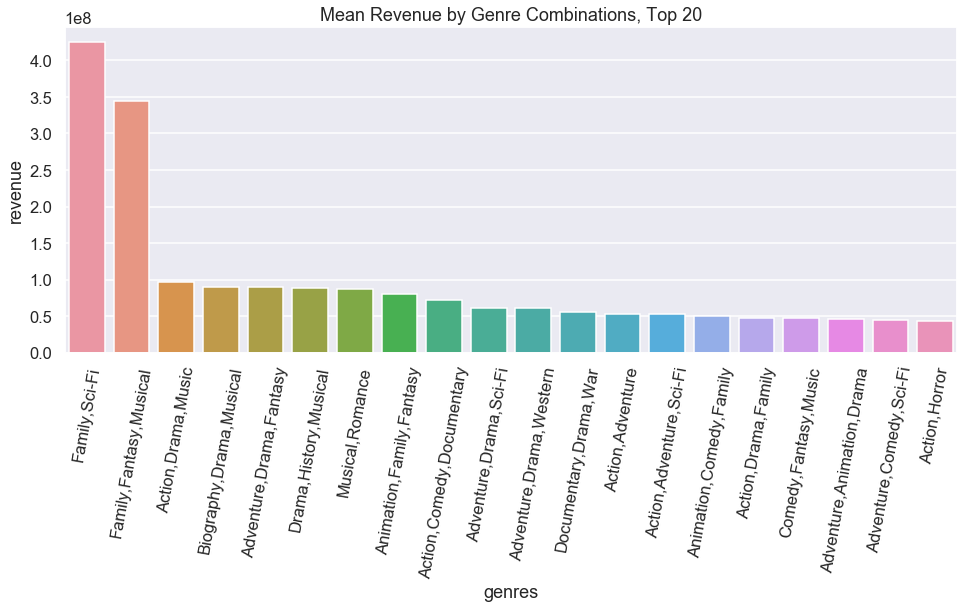

In [6]:
plt.figure(figsize=(16, 6))
top_grouped_genres = main_df.groupby('genres')['genres', 'revenue'].mean(
).sort_values('revenue', ascending=False).head(20).reset_index()
ax = sns.barplot(x='genres', y='revenue', data=top_grouped_genres)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.title('Mean Revenue by Genre Combinations, Top 20');

Seems strange to have such a large difference between the first three, what is the distribution for each grouping?

In [7]:
top_genres = list(top_grouped_genres['genres'])

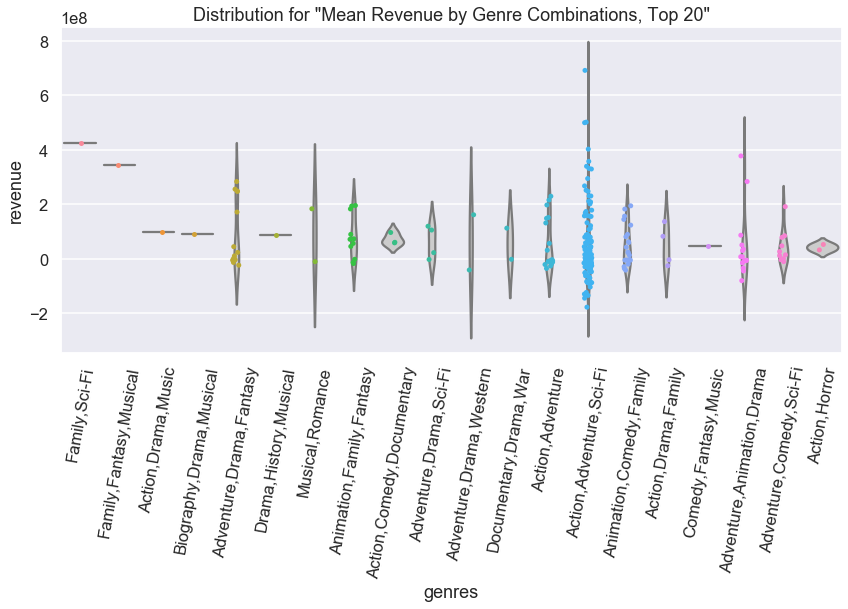

In [8]:
fig = plt.figure(figsize=(14, 6))
ax = sns.violinplot(x="genres", y="revenue", data=main_df[main_df['genres'].isin(top_genres)],
                    inner=None, color=".8", order=top_genres)
ax = sns.stripplot(x="genres", y="revenue", data=main_df[main_df['genres'].isin(
    top_genres)], order=top_genres)
ax.set_title('Distribution for "Mean Revenue by Genre Combinations, Top 20"')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

This graph is telling us that these groupings are so specific, the top four genres each are based on only one movie:

In [9]:
main_df[main_df['genres'] == 'Family,Sci-Fi']

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date,month
22,tt0083866,E.T. the Extra-Terrestrial,1982,Steven Spielberg,Universal Pictures,1260,10000000.0,435000000.0,425000000.0,True,"Family,Sci-Fi",1982-06-11,June


In [10]:
main_df[main_df['genres'] == 'Action,Drama,Music']

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date,month
538,tt0103855,The Bodyguard,1992,Mick Jackson,Kasdan Pictures,4113,25000000.0,122000000.0,97000000.0,False,"Action,Drama,Music",1992-11-25,November


I'm not a fan of using the genres grouped together like this. 

Perhaps we will have better luck with splitting up the genres.

### b. Which individual genres make the most profit:

Let me explode the dataframe so each genre is on its own row:

In [11]:
main_df['genres'] = main_df['genres'].str.split(',')

In [12]:
exploded_main_df = main_df.explode('genres')

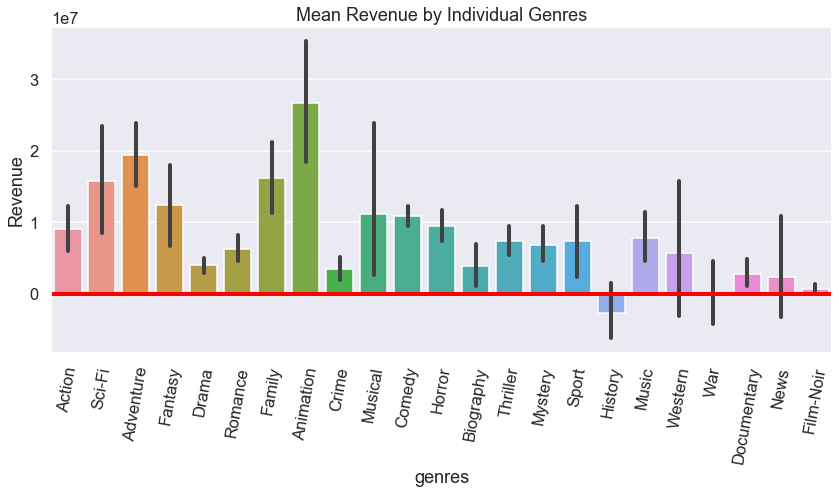

In [13]:
plt.figure(figsize=(14, 6))
data_solo_genres = exploded_main_df[['genres', 'revenue']].sort_values(
    'revenue', ascending=False)
ax = sns.barplot(x='genres', y='revenue', data=data_solo_genres)
plt.title('Mean Revenue by Individual Genres')
plt.ylabel('Revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.axhline(linewidth=4, color='r');

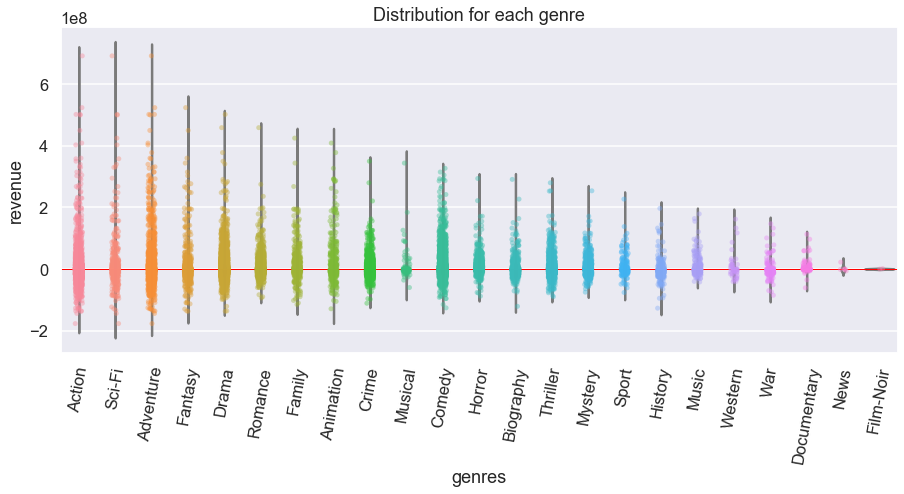

In [14]:
fig = plt.figure(figsize=(15, 6))

data = exploded_main_df[['genres', 'revenue']
                        ].sort_values('revenue', ascending=False)
ax = sns.violinplot(x="genres", y="revenue", data=data,
                    inner=None, color=".8")
ax = sns.stripplot(x="genres", y="revenue", data=data, alpha=.4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.axhline(linewidth=1, color='r')
plt.title('Distribution for each genre');

### Deeper look:

This looks like a more even distribution than it did when using genre groups instead.

Let's check out some of the genres to make sure they are correct:

In [15]:
# columns and statistics to view:
numeric_columns = ['year', 'budget_usd', 'us_gross', 'revenue']
aggregates = ['count', 'mean', 'std', 'median']

In [16]:
# explore statistical values:
exploded_main_df[exploded_main_df['genres'] ==
                 'Animation'][numeric_columns].agg(aggregates)

,year,budget_usd,us_gross,revenue
count,358.000000,3.580000e+02,3.580000e+02,3.580000e+02
mean,2004.687151,6.252854e+07,8.912995e+07,2.660141e+07
std,13.171670,5.515029e+07,1.037749e+08,7.751831e+07
median,2008.000000,5.000000e+07,5.250000e+07,1.000000e+06


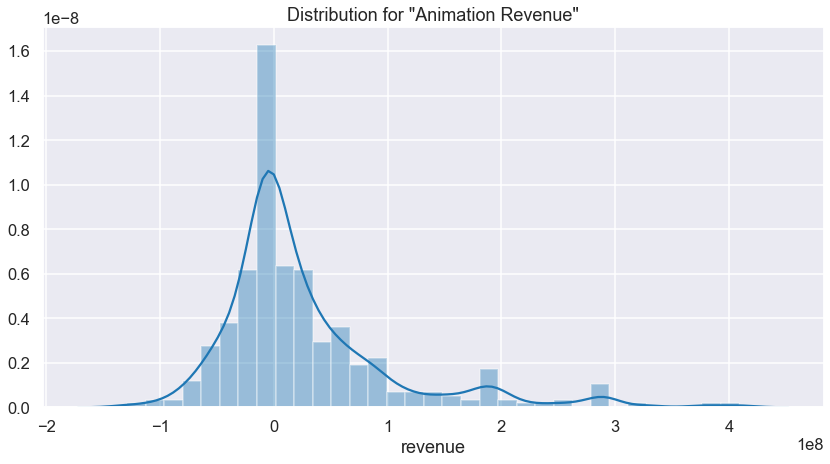

In [17]:
# distribution:
plt.figure(figsize=(14, 7))
data_genres_anim = exploded_main_df[exploded_main_df['genres']
                                    == 'Animation']['revenue']
sns.distplot(data_genres_anim)
plt.title('Distribution for "Animation Revenue"');

In [18]:
exploded_main_df[exploded_main_df['genres'] == 'Animation'].sample(3)

,imdb_id,title,year,director,production_co,rank,budget_usd,us_gross,revenue,popular,genres,date,month
183,tt0441773,Kung Fu Panda,2008,Mark Osborne,DreamWorks Animation,2012,130000000.0,215000000.0,85000000.0,True,Animation,2008-06-04,June
534,tt1979388,The Good Dinosaur,2015,Peter Sohn,Pixar Animation Studios,2491,200000000.0,123000000.0,-77000000.0,True,Animation,2015-11-14,November
7099,tt0113234,Gumby: The Movie,1995,Art Clokey,Premavision Inc.,70102,2800000.0,57000.0,-2743000.0,False,Animation,1995-12-01,December


In [19]:
# explore statistical values:
exploded_main_df[exploded_main_df['genres'] ==
                 'History'][numeric_columns].agg(aggregates)

,year,budget_usd,us_gross,revenue
count,277.000000,2.770000e+02,2.770000e+02,2.770000e+02
mean,2004.277978,2.567011e+07,2.300425e+07,-2.665868e+06
std,13.326393,2.976278e+07,3.816086e+07,3.292138e+07
median,2007.000000,1.600000e+07,5.700000e+06,-4.862490e+06


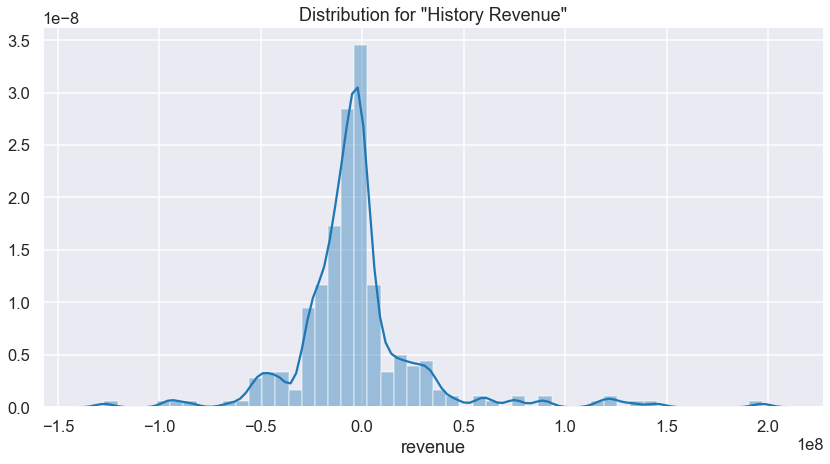

In [20]:
# distribution:
plt.figure(figsize=(14, 7))
data_genres_hist = exploded_main_df[exploded_main_df['genres']
                                    == 'History']['revenue']
sns.distplot(data_genres_hist)
plt.title('Distribution for "History Revenue"');

After analyzing the two genres, it looks like they have similar distributions (slightly skewed) and no weird outiers. From that I conclude that the results are in fact legitimate, and that no sane person would make a history movie for profit.

## 2. Which director has the highest total revenue from films:

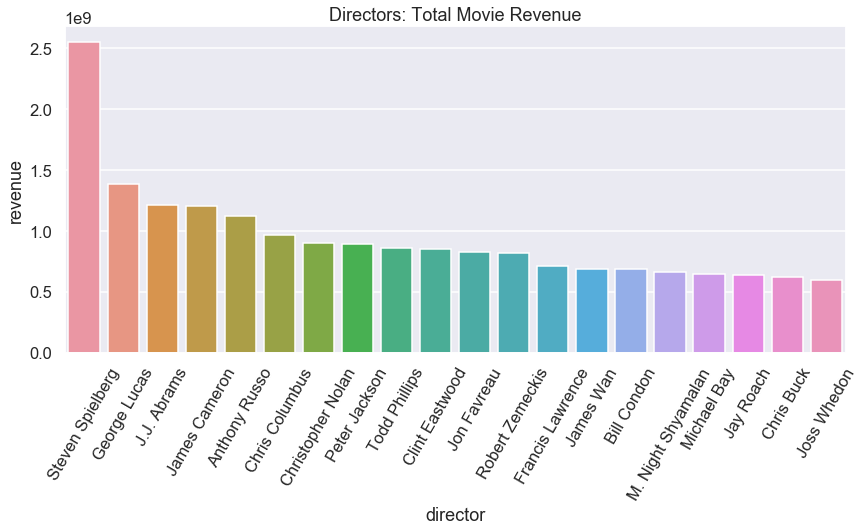

In [21]:
plt.figure(figsize=(14, 6))
data_directors = main_df.groupby('director')['revenue', 'director'].sum(
).sort_values('revenue', ascending=False).head(20).reset_index()
ax = sns.barplot(x="director", y="revenue", data=data_directors,
                 label="Mean")
plt.title("Directors: Total Movie Revenue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.axhline(linewidth=1, color='r');

Which director has the highest revenue for each individual genre:

In [22]:
# create list of genres:
genres = list(exploded_main_df['genres'].unique())

In [23]:
# use list of genres to create dictionary of dataframes:
director_genres = {}
for genre in genres:
    director_genres[genre] = exploded_main_df[exploded_main_df['genres'] == genre].groupby(
        'director').sum().sort_values('revenue', ascending=False).reset_index().head()

In [24]:
# random color generator:
N = 6
df = pd.Series(np.random.randint(10, 50, N), index=np.arange(1, N+1))

cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)

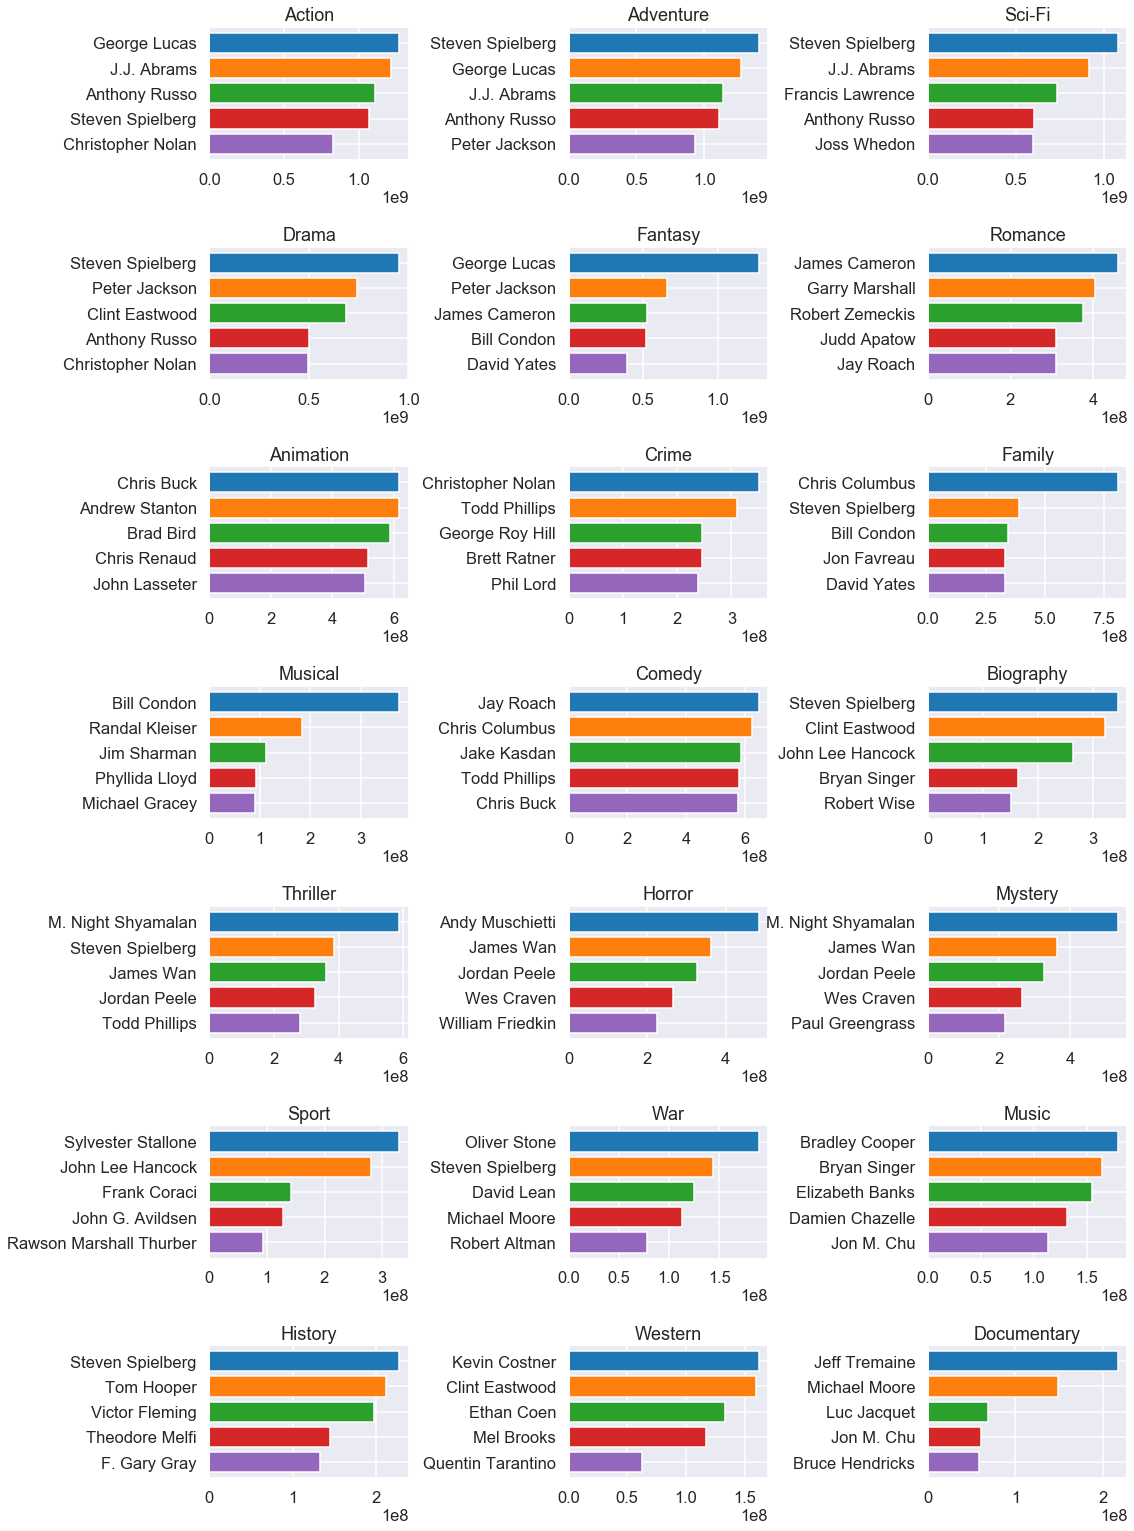

In [25]:
# use dictionary of dataframes to create subplots:
fig, ax = plt.subplots(7, 3, figsize=(15, 24))
for i, axe in enumerate(ax.flat):
    axe.barh(director_genres[genres[i]]['director'],
             director_genres[genres[i]]['revenue'], color=colors)
    axe.set_title(genres[i])
    axe.invert_yaxis()


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.65,
                    wspace=0.8)
plt.show()

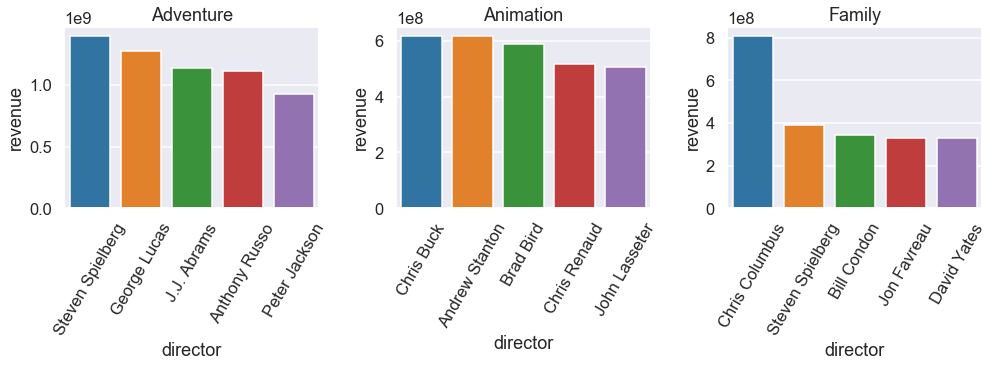

In [26]:
top_genres = ['Adventure', 'Animation', 'Family']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
for i, axe in enumerate(ax.flat):
    sns.barplot(x="director", y="revenue", data=director_genres[top_genres[i]],
                label="Mean", ax=axe)
    axe.set_xticklabels(axe.get_xticklabels(), rotation=60)
    axe.set_title(top_genres[i])

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.65,
                    wspace=0.3)
plt.show()

## 3. What is the best month to release a movie:

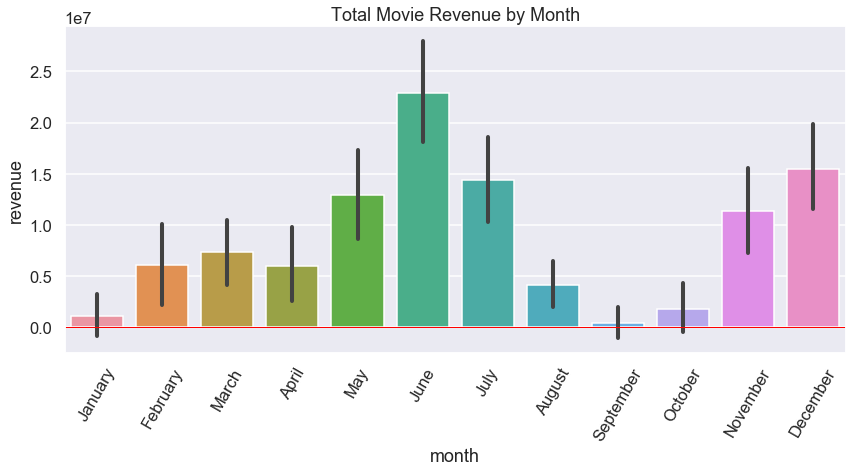

In [27]:
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(14, 6))
data = main_df[['month', 'revenue']].sort_values('revenue', ascending=False)

ax = sns.barplot(x="month", y="revenue", data=data,
                 label="Mean", order=months_ordered)

plt.title("Total Movie Revenue by Month")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.axhline(linewidth=1, color='r');

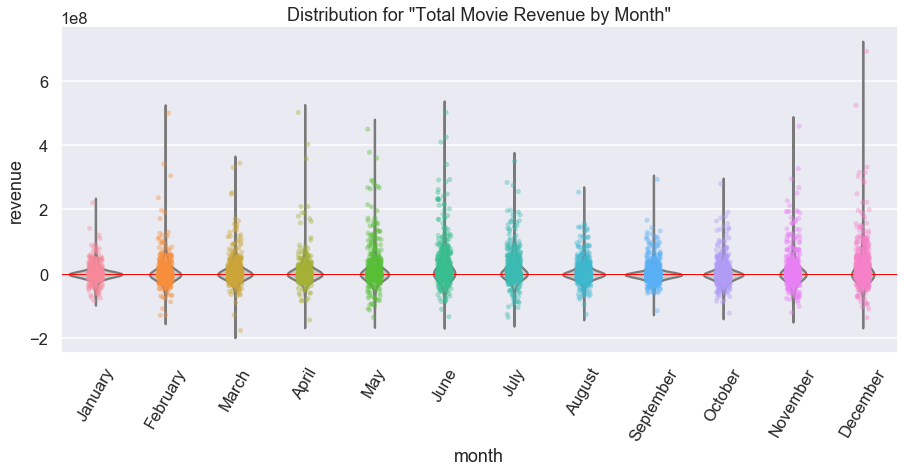

In [28]:
fig = plt.figure(figsize=(15, 6))
data = main_df[['month', 'revenue', 'popular']
               ].sort_values('revenue', ascending=False)

ax = sns.violinplot(x="month", y="revenue", data=data,
                    inner=None, color=".8", split=False, order=months_ordered)

ax = sns.stripplot(x="month", y="revenue", data=data,
                   alpha=.4, order=months_ordered)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.axhline(linewidth=1, color='r')
plt.title('Distribution for "Total Movie Revenue by Month"');

### 3.b What is the best month to release a film within a specified genre:

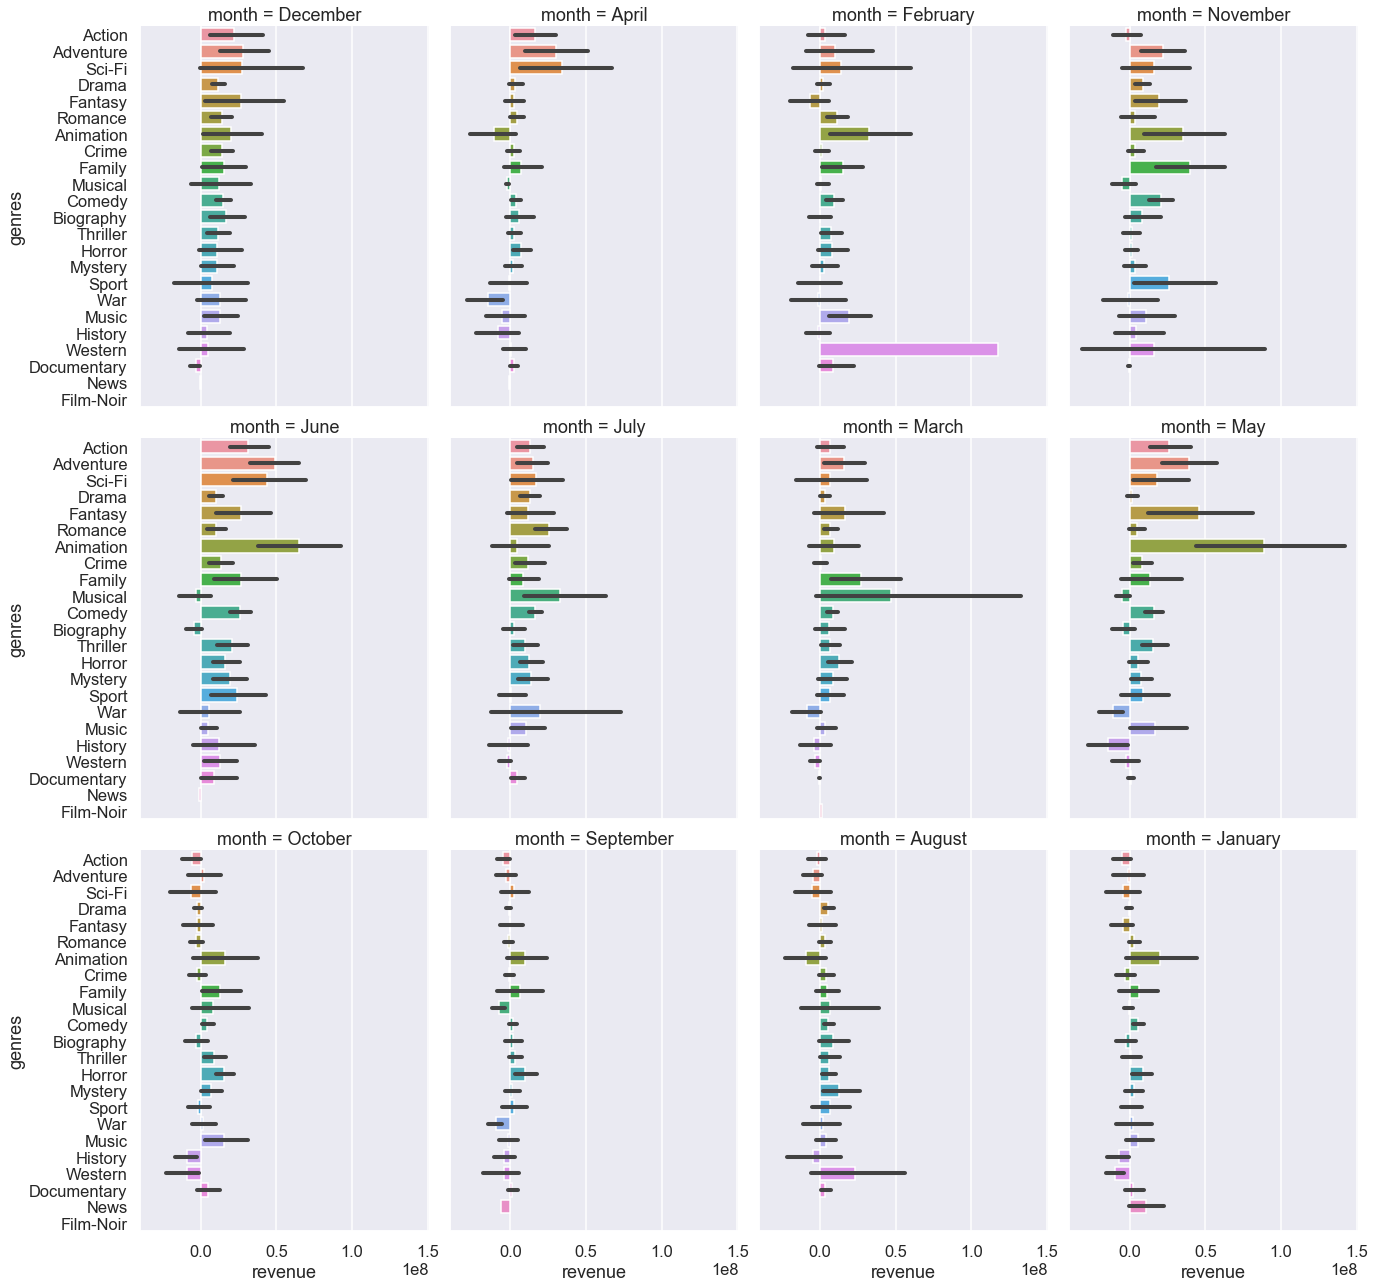

In [29]:
data = exploded_main_df[['month', 'revenue', 'genres']]
ax = sns.catplot(x="revenue", y='genres',
                 col="month", data=data, kind='bar', col_wrap=4,
                 height=6, aspect=.8);

## 4. What content appears most often in high revenue titles:

In [30]:
# bring in keywords:
keywords_df_path = os.path.join(os.pardir, 'data', 'processed', 'keywords.csv')
keywords_df = pd.read_csv(keywords_df_path)

In [31]:
# join keywords with main dataframe:
keywords_df = main_df.set_index('imdb_id').join(
    keywords_df.set_index('imdb_id')).reset_index()

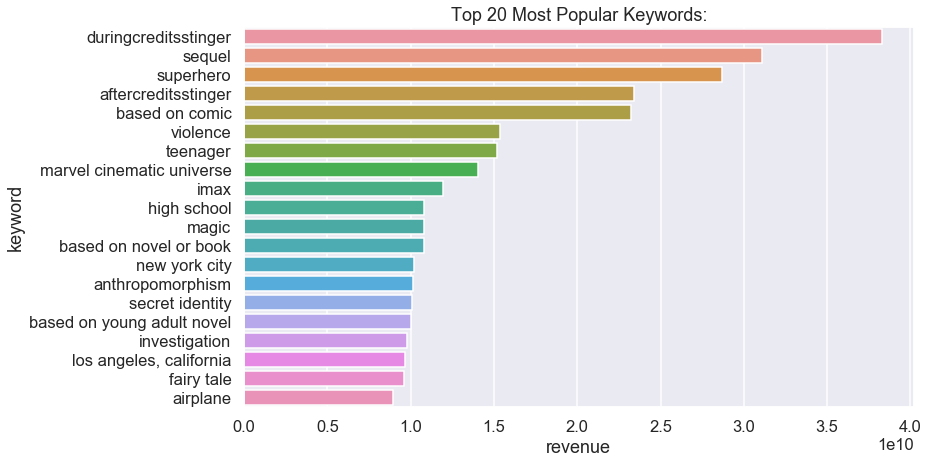

In [32]:
# plot top 20 keyword sums:
plt.figure(figsize=(12, 7))
data_keywords = keywords_df.groupby('keyword')['keyword', 'revenue'].sum().sort_values(
    ascending=False, by='revenue').head(20).reset_index()
plt.xlabel('Total revenue')
plt.title('Top 20 Most Popular Keywords:')

ax = sns.barplot(x="revenue", y="keyword", data=data_keywords,
                 label="Mean", orient='h');

### 4.b What are the most popular keywords per month:

In [33]:
# create dictionary of dataframes:
keyword_months = {}
for month in months_ordered:
    keyword_months[month] = keywords_df[keywords_df['month'] == month].groupby(
        'keyword').sum().sort_values('revenue', ascending=False).reset_index().head()

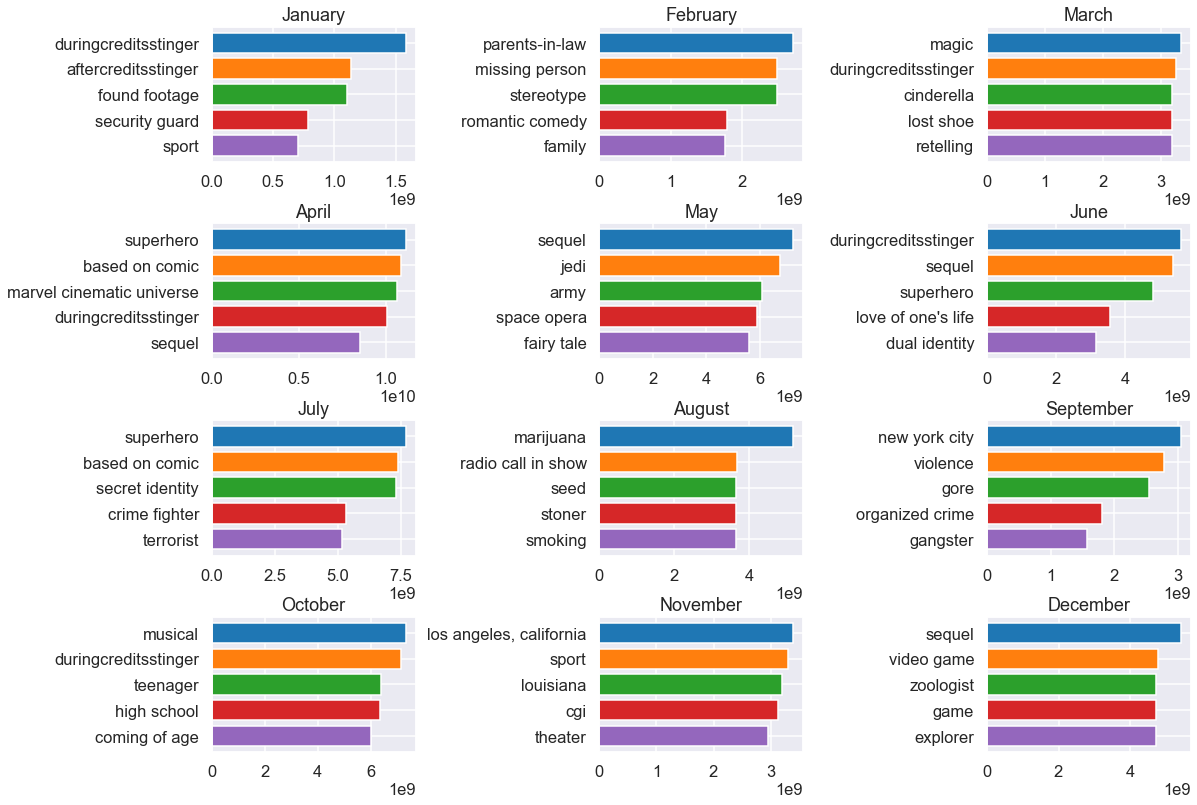

In [34]:
# use dictionary of dataframes to create subplots:
fig, ax = plt.subplots(4, 3, figsize=(16, 12))
for i, axe in enumerate(ax.flat):
    axe.barh(keyword_months[months_ordered[i]]['keyword'],
             keyword_months[months_ordered[i]]['revenue'], color=colors)
    axe.set_title(months_ordered[i])
    axe.invert_yaxis()


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.9)
plt.show()

In [35]:
# sns.pairplot(main_df[['rank', 'budget_usd', 'us_gross', 'revenue']])

## Conclusion:

In conclusion, I was able to find all the information I needed to answer my questions I asked at the beginning:
1. What genre to choose
2. Which director to hire 
3. When to release the film
4. What content to include

The genres was a little bit tricky, and in the end needed to be split up so there was more of a distribution to go off of. In the end though I was able to create a dataframe that identifies which genres are the most popular, and they can even be analyzed in a more specific way such as popularity during specific months or per director.

The director column was pretty straight foward and made sense right away. I thought about making a time cutoff for directors, only including directors from the last 20 years or so. I changed my mind though because I think a movie could be very succesful as a reboot of an old 60's movie using the original director. Not to mention George Lucas and Steven Spielberg would be disincluded by that time limit and they are still incredibly succesful directors.

The release month was not bad at all, thanks to the API that I used to fill in all the missing date values from my data set. All I had to to was convert them to datetime objects and then create a new column with the month name method. Once I had the data for month it was possible to dial in to more specific questions, such as best genre per month and best keywords per month. I did end up dividing the dataset into 12 sub dataframes, which I'm not sure is the best solution. I tried to find ways of doing it with groupby and multi-index's and I kind of got it to work. 

The content was a fun section and wasn't too bad. I created a Node.js program that will parse the .csv for my dataframe, and will create a list of imbd_id's. It then calls the API for each id and creates a MongoDB document containing the film with the date, and then it creates another document containing all the keywords and the id they belong to. Once I had this information in the database I was able to export it all as a csv and incorporate it into the projet. The keywords were fun to analyze, because they are crowdsourced and are a reflection of how the public perceives the films. Not surprisingly the succesful films were tagged with keywords such as 'sequel', 'based on comic book', 'marvel universe', and 'violence'. 